# **Dicoding Project Submission : Image Classification (Rock Paper Scissors)**
by Fakhri Rizal Santosa
fakhrizal.frs@gmail.com

Untuk Submission, dikarenakan adanya challenge, saya mencoba treatment :
- Augmentasi Gambar :
  Menambahkan width_shift_range dan zoom_range
- Loss-Function :
  Tidak menggunakan categorical_crossentropy
  tapi mencoba sparse_categorical_crossentropy
- Model Accuracy :
  Akurasi akan di-*challenge* untuk mencapai target 96%
- Penggunaan Callback untuk stopping model.fit
- Function untuk print_out training model
- Target Training Max 30 menit

# **Step 1 : Data Preparation**

In [ ]:
#import library yang di perlukan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from keras.callbacks import Callback
from keras.preprocessing import image
import zipfile
import os
import shutil
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
from google.colab import files

In [ ]:
#import image dataset rockpaperscissors
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-03 11:50:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  6.21MB/s    in 60s     

2021-07-03 11:51:19 (5.11 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Ekstraksi file rockpaperscissors.zip
with zipfile.ZipFile('/content/rockpaperscissors.zip', 'r') as zip_rps:
  zip_rps.extractall('/content/')

#Cek hasil extract folder
os.listdir('/content/rockpaperscissors')

['paper', 'rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
#Hitung Jumlah Data di masing masing tipe
file_rock = os.listdir('/content/rockpaperscissors/rock')
file_paper = os.listdir('/content/rockpaperscissors/paper')
file_scissors = os.listdir('/content/rockpaperscissors/scissors')
print('Jumlah File Rock : ',len(file_rock), ' | Jumlah File Paper : ',len(file_paper), 
      ' | Jumlah File Scissors : ',len(file_scissors))

Jumlah File Rock :  726  | Jumlah File Paper :  712  | Jumlah File Scissors :  750


In [ ]:
#Membuat folder Untuk memisahkan Data Training & Validation (Menggunakan cara berbeda)
parent_dir = '/content/learn/'
train_dir = os.path.join(parent_dir, 'train')
validation_dir = os.path.join(parent_dir, 'validation')
os.mkdir(parent_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
#Membuat folder RPS (rockpaperscissors) di setiap folder Data Training & Validation

#training sub directory
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)

#validation sub directory
vald_rock = os.path.join(validation_dir, 'rock')
vald_paper = os.path.join(validation_dir, 'paper')
vald_scissors = os.path.join(validation_dir, 'scissors')
os.mkdir(vald_rock)
os.mkdir(vald_paper)
os.mkdir(vald_scissors)

In [ ]:
#Copying file rock 726 : Validation 290 item, Training 436
for r in range(len(file_rock)):
  if r < 290 :
    set_v_rock = os.path.join('/content/rockpaperscissors/rock/', 
                              file_rock[r])
    move_v_rock = os.path.join('/content/learn/validation/rock/', 
                               file_rock[r])
    shutil.copyfile(set_v_rock, move_v_rock)
  else : 
    set_t_rock = os.path.join('/content/rockpaperscissors/rock/', 
                              file_rock[r])
    move_t_rock = os.path.join('/content/learn/train/rock/', 
                               file_rock[r])
    shutil.copyfile(set_t_rock, move_t_rock)

In [ ]:
#Copying file paper 712 : Validation 284 item, Training 428
for p in range(len(file_paper)):
  if p < 284 :
    set_v_paper = os.path.join('/content/rockpaperscissors/paper/', 
                               file_paper[p])
    move_v_paper = os.path.join('/content/learn/validation/paper/', 
                                file_paper[p])
    shutil.copyfile(set_v_paper, move_v_paper)
  else : 
    set_t_paper = os.path.join('/content/rockpaperscissors/paper/', 
                               file_paper[p])
    move_t_paper = os.path.join('/content/learn/train/paper/', 
                                file_paper[p])
    shutil.copyfile(set_t_paper, move_t_paper)

In [ ]:
#Copying file scissors 750 : Validation 300 item, Training 450
for s in range(len(file_scissors)):
  if s < 300 :
    set_v_scissors = os.path.join('/content/rockpaperscissors/scissors/', 
                                  file_scissors[s])
    move_v_scissors = os.path.join('/content/learn/validation/scissors/', 
                                   file_scissors[s])
    shutil.copyfile(set_v_scissors, move_v_scissors)
  else : 
    set_t_scissors = os.path.join('/content/rockpaperscissors/scissors/', 
                                  file_scissors[s])
    move_t_scissors = os.path.join('/content/learn/train/scissors/', 
                                   file_scissors[s])
    shutil.copyfile(set_t_scissors, move_t_scissors)

In [ ]:
#Mengecek jumlah data training dan validation agar sesuai ketentuan submission
#data Train
t_rock = len(os.listdir('/content/learn/train/rock'))
t_paper = len(os.listdir('/content/learn/train/paper'))
t_scissors = len(os.listdir('/content/learn/train/scissors'))

#data Validation
v_rock = len(os.listdir('/content/learn/validation/rock'))
v_paper = len(os.listdir('/content/learn/validation/paper'))
v_scissors = len(os.listdir('/content/learn/validation/scissors'))

#Total
train_total = t_rock + t_paper + t_scissors
val_total = v_rock + v_paper + v_scissors
total_data = train_total + val_total

#Print Informasi
print('Total Data Train =', train_total, ' | Percentage', 
      round(train_total/total_data*100), '%' )
print('Total Data Val   =', val_total, '  | Percentage', 
      round(val_total/total_data*100), '%' )

Total Data Train = 1314  | Percentage 60 %
Total Data Val   = 874   | Percentage 40 %


## **Step 2 : Memulai Augmentasi Gambar**


---



In [ ]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    width_shift_range = 0.2, #Additional
                    zoom_range = 0.1, #Additional
                    fill_mode = 'wrap')

test_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    width_shift_range = 0.2, #Additional
                    zoom_range = 0.1, #Additional
                    fill_mode = 'wrap')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size = (100, 150),
        class_mode = 'sparse') #untuk sparse categorical

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size = (100, 150), 
        class_mode = 'sparse') #untuk sparse categorical

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **Step 3 : Permodelan**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
#Cek summary model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 256)        2

In [ ]:
#Loss using sparse_categorical_crossentropy & Adam Optimizer
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['sparse_categorical_accuracy'])

In [ ]:
#Callback untuk interrupt proses training ketika mencapai acccuracy 96%
accuracy_thrs = 0.96 #Batas yang diharapkan
class stopThrsh(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('sparse_categorical_accuracy') >= accuracy_thrs and 
           logs.get('val_sparse_categorical_accuracy') >= accuracy_thrs): 
          #Print Informasi ketika mencapai threshold  
          print("\nAkurasi mencapai threshold %2.2f%%" %(accuracy_thrs*100))
          print("\nAkurasi berhenti di %2.2f%%" %(logs.get('sparse_categorical_accuracy')*100))   
          self.model.stop_training = True

erlyStop = stopThrsh()

In [ ]:
#Fungsi Mencetak Performa Model dalam bentuk grafik
def evaluation_model(model):
  plt.figure(figsize = (15, 5))
  
  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = model.history['sparse_categorical_accuracy']
  acc_val = model.history['val_sparse_categorical_accuracy']
  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
  plt.plot(epochs, acc_val,'r', label = 'Validation Accuracy')
  plt.title('Training & Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  
  # Loss plot
  plt.subplot(1, 2, 2)
  loss = model.history['loss']
  loss_val = model.history['val_loss']
  epochs = range(len(loss))

  plt.plot(epochs, loss, 'b', label='Training Accuracy')
  plt.plot(epochs, loss_val,'r', label='Validation Accuracy')
  plt.title('Training & Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

Epoch 1/20
20/20 - 35s - loss: 1.0931 - sparse_categorical_accuracy: 0.3703 - val_loss: 1.0357 - val_sparse_categorical_accuracy: 0.3432
Epoch 2/20
20/20 - 33s - loss: 0.7497 - sparse_categorical_accuracy: 0.6852 - val_loss: 0.4434 - val_sparse_categorical_accuracy: 0.8455
Epoch 3/20
20/20 - 33s - loss: 0.4928 - sparse_categorical_accuracy: 0.7967 - val_loss: 0.4468 - val_sparse_categorical_accuracy: 0.8501
Epoch 4/20
20/20 - 34s - loss: 0.4044 - sparse_categorical_accuracy: 0.8656 - val_loss: 0.3500 - val_sparse_categorical_accuracy: 0.8616
Epoch 5/20
20/20 - 33s - loss: 0.3969 - sparse_categorical_accuracy: 0.8525 - val_loss: 0.3106 - val_sparse_categorical_accuracy: 0.8924
Epoch 6/20
20/20 - 33s - loss: 0.4209 - sparse_categorical_accuracy: 0.8344 - val_loss: 0.3201 - val_sparse_categorical_accuracy: 0.8959
Epoch 7/20
20/20 - 33s - loss: 0.2784 - sparse_categorical_accuracy: 0.8934 - val_loss: 0.2530 - val_sparse_categorical_accuracy: 0.8993
Epoch 8/20
20/20 - 34s - loss: 0.2086 - s

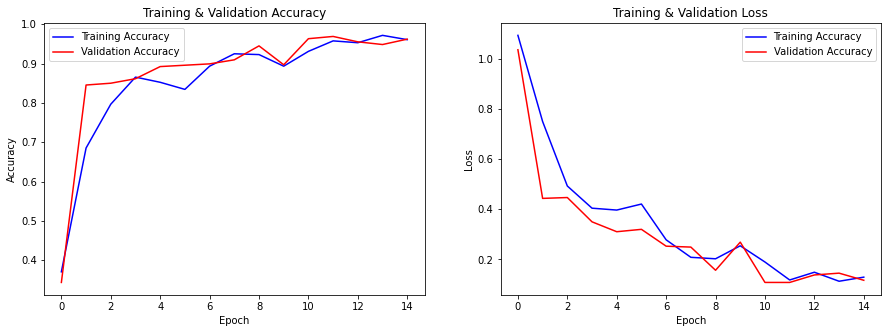

In [ ]:
start = time.time()

#Start Training
history_mdl = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 20,
    validation_data = validation_generator,
    verbose = 2,
    callbacks = [erlyStop]
)

#Time & Performance Print
print("Time Training: ", round((time.time() - start)/60) , "menit")
evaluation_model(history_mdl)

# **Step 4 : Pengujian Model**

In [ ]:
def prediction(image_upload, model = model):
  img_upl = np.asarray(image_upload)
  img_upl = img_upl*(1/225)
  img_test = tf.reshape(img_upl, shape = [1, 100, 150, 3])

  confidence = sorted(model.predict(img_test)[0])[2]
  classes = np.argmax(model.predict(img_test))

  if classes == 0:
      label = 'Paper'
  elif classes == 1:
      label = 'Rock'
  else:
      label = 'Scissors'

  plt.show()
  print("Image prediction result: ", label)
  print("Confidence: ", round(confidence*100,2), "%")

Saving 1VRzspyXpQ6A2rKy.png to 1VRzspyXpQ6A2rKy.png


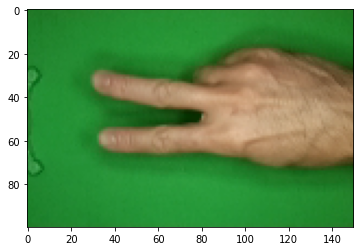

Image prediction result:  Scissors
Confidence:  99.37 %


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

prediction(img)